## THIS NOTEBOOK AIMS TO SHOWCASE A SIMPLE DATA ANALYSIS PROCESS USING PYTHON LIBRARIES. ##

# SET UP THE ENVIRONMENT. #

In [3]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 4.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.1 MB 4.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 2.9 MB/s eta 0:0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# load the data into a pandas DataFrame #

In [6]:
# Import the pandas library
import pandas as pd

# Define the file path.
file_path = 'metadata.csv'

# Use the read_csv function to load the data into a DataFrame.
print("Loading the dataset... This might take a moment.")
df = pd.read_csv(file_path, low_memory=False) # 'low_memory=False' helps with mixed data types
print("Dataset loaded successfully!")

# --- Let's start exploring ---

# 1. Examine the first few rows
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

Loading the dataset... This might take a moment.
Dataset loaded successfully!

First 5 rows of the DataFrame:
   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed

# basic data exploration #

In [9]:
# Check the DataFrame dimensions (rows, columns)
print(f"\nDataFrame shape: {df.shape}")
print(f"This means the dataset has {df.shape[0]} rows (papers) and {df.shape[1]} columns (attributes).")

# Get a concise summary of the DataFrame (including data types and non-null counts)
print("\nDataFrame Info:")
df.info()


DataFrame shape: (1056660, 19)
This means the dataset has 1056660 rows (papers) and 19 columns (attributes).

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  48

# check for missing values #

In [12]:
# Check for missing values in each column
print("\nMissing values per column:")
# isnull() creates a boolean DataFrame (True if missing, False if not)
# .sum() then counts the 'True' values for each column
missing_values = df.isnull().sum()

# Display columns with at least one missing value, sorted from most to least
print(missing_values[missing_values > 0].sort_values(ascending=False))


Missing values per column:
mag_id              1056660
arxiv_id            1042411
pmc_json_files       740918
sha                  682894
pdf_json_files       682894
pmcid                667089
who_covidence_id     573725
pubmed_id            557728
doi                  399880
url                  369726
abstract             235544
journal               87322
s2_id                 80192
authors               23869
publish_time           1814
title                   503
dtype: int64


# Generate basic statistics #

In [15]:
# Generate basic statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
       mag_id         s2_id
count     0.0  9.764680e+05
mean      NaN  2.175871e+08
std       NaN  5.312281e+07
min       NaN  9.600000e+01
25%       NaN  2.211411e+08
50%       NaN  2.320829e+08
75%       NaN  2.373948e+08
max       NaN  2.491936e+08


## DATA CLEANING AND PREPARATION ##

# step 1: handling missing data. #
#  Our analysis will focus on paper titles, abstracts, journals, and publication dates. If a paper is missing any of these key pieces of information, #
# it's not very useful for our specific goals. #

In [19]:
# Calculate the percentage of missing values for each column
# Looking at the percentage of missing data is often more informative than the raw count.
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display columns with more than 0% missing values, sorted
print("Percentage of missing values per column:")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

Percentage of missing values per column:
mag_id              100.000000
arxiv_id             98.651506
pmc_json_files       70.118865
sha                  64.627600
pdf_json_files       64.627600
pmcid                63.131849
who_covidence_id     54.296084
pubmed_id            52.782163
doi                  37.843772
url                  34.990063
abstract             22.291371
journal               8.263964
s2_id                 7.589196
authors               2.258910
publish_time          0.171673
title                 0.047603
dtype: float64


# create a new DataFrame with only the essential details. #
# Our analysis relies heavily on the [title, abstract, journal, and publish_time]. #
# A simple and effective strategy for cleaning is to remove any rows where these essential data points are missing. #

In [31]:
# Define the essential columns for our analysis
essential_columns = ['title', 'abstract', 'journal', 'publish_time']

# Drop rows where any of the essential columns have missing values
print(f"\nOriginal DataFrame shape: {df.shape}")
df_cleaned = df.dropna(subset=essential_columns).copy()
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# Verify that the missing values in these columns are gone
print("\nMissing values in essential columns after cleaning:")
print(df_cleaned[essential_columns].isnull().sum())


Original DataFrame shape: (1056660, 19)
Cleaned DataFrame shape: (742007, 19)

Missing values in essential columns after cleaning:
title           0
abstract        0
journal         0
publish_time    0
dtype: int64


## Feature Engineering(Preparing Data for Analysis) ##

# step 2a: Convert publish_time to Datetime Format. #
# 'df.info()' showed us that publish_time is an object (a string). We can't perform time-based analysis on strings. #
# We need to convert it to a proper datetime format. #

In [33]:
# Convert the 'publish_time' column to datetime objects
# 'errors='coerce'' will turn any un-parseable dates into 'NaT' (Not a Time)
df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], errors='coerce')

# Drop any rows that couldn't be converted (they become NaT)
df_cleaned.dropna(subset=['publish_time'], inplace=True)

print("\nData type of 'publish_time' column after conversion:")
print(df_cleaned['publish_time'].dtype)


Data type of 'publish_time' column after conversion:
datetime64[ns]


# step 2b: Extract Year from publish_time. #
# For our "publications by year" analysis, we need a separate column containing just the year. #
# Pandas makes this incredibly easy once the column is in datetime format. #

In [36]:
# Create a new column 'publish_year' by extracting the year from 'publish_time'
df_cleaned['publish_year'] = df_cleaned['publish_time'].dt.year

# Display the first few rows to see our new column
print("\nDataFrame with the new 'publish_year' column:")
print(df_cleaned[['publish_time', 'publish_year']].head())


DataFrame with the new 'publish_year' column:
  publish_time  publish_year
0   2001-07-04          2001
1   2000-08-15          2000
2   2000-08-25          2000
3   2001-02-22          2001
4   2001-05-11          2001


# step 2c: Create an abstract_word_count Column. #
# Feature engineering (creating new columns from existing ones) is a common task. #
# Create a column that counts the number of words in each abstract. #
# This could be interesting to see if abstract lengths change over time. #

In [39]:
# Create a new column for the word count of the abstract
# .str allows us to apply string operations to the whole column
df_cleaned['abstract_word_count'] = df_cleaned['abstract'].str.split().str.len()

# Display the first few rows with the new word count column
print("\nDataFrame with the new 'abstract_word_count' column:")
print(df_cleaned[['abstract', 'abstract_word_count']].head())

# Let's also get some quick stats on our new column
print("\nStatistics for abstract word count:")
print(df_cleaned['abstract_word_count'].describe())


DataFrame with the new 'abstract_word_count' column:
                                            abstract  abstract_word_count
0  OBJECTIVE: This retrospective chart review des...                  262
1  Inflammatory diseases of the respiratory tract...                  142
2  Surfactant protein-D (SP-D) participates in th...                  219
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...                   68
4  Respiratory syncytial virus (RSV) and pneumoni...                  110

Statistics for abstract word count:
count    380295.000000
mean        213.660650
std         101.010549
min           1.000000
25%         154.000000
50%         210.000000
75%         259.000000
max       18000.000000
Name: abstract_word_count, dtype: float64


## DATA ANALYSIS AND VISUALIZATION. ##

# set up the environment for visualization. #

In [43]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a nice style for the plots
sns.set_style('whitegrid')
print("Visualization libraries imported and style set.")

Visualization libraries imported and style set.


# step 1. Perform a basic analysis. #
# Analysis 1: Count Papers by Publication Year. #

In [48]:
# Perform value_counts on the 'year' column and sort by the index (the year)
year_counts = df_cleaned['publish_year'].value_counts().sort_index()

# The dataset is huge and may contain dates far in the past or future.
# Let's filter for a reasonable range, e.g., after 2018, as CORD-19 is recent.
year_counts = year_counts[year_counts.index > 2018]


print("Number of publications per year (after 2018):")
print(year_counts)

Number of publications per year (after 2018):
publish_year
2019      4914
2020    103291
2021    168065
2022     69113
2023         1
Name: count, dtype: int64


# Analysis 2: Identify Top Journals. #

In [51]:
# Perform value_counts on the 'journal' column to find the top 15
top_journals = df_cleaned['journal'].value_counts().head(15)

print("\nTop 15 publishing journals:")
print(top_journals)


Top 15 publishing journals:
journal
bioRxiv                            8873
Int J Environ Res Public Health    8192
PLoS One                           7145
Sci Rep                            4078
Front Psychol                      3103
Cureus                             2951
Viruses                            2566
BMJ Open                           2556
Front Immunol                      2549
Int J Mol Sci                      2294
Front Public Health                2232
J Clin Med                         1934
Vaccines (Basel)                   1817
J Med Virol                        1611
Open Forum Infect Dis              1508
Name: count, dtype: int64


# Analysis 3: Find Most Frequent Words in Titles. #

In [54]:
# Combine all titles into one large string, separated by spaces
all_titles = ' '.join(df_cleaned['title'])

# Define a set of common English stop words
# We can add domain-specific words like 'covid-19' if we want to exclude them
stop_words = set(['the', 'a', 'an', 'of', 'in', 'and', 'for', 'to', 'on', 'with', 'is', 'are', 'was', 'were', 'by', 'as', 'at', 'from'])

# Create a WordCloud object
# We specify background_color and the stopwords list
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_titles)

print("\nWord cloud generated successfully.")


Word cloud generated successfully.


# Analysis 4: Distribution of Paper Counts by Source. #

In [57]:
# Perform value_counts on the 'source_x' column
source_counts = df_cleaned['source_x'].value_counts().head(10)

print("\nTop 10 sources of papers:")
print(source_counts)


Top 10 sources of papers:
source_x
Medline; PMC                   129255
Medline; PMC; WHO               58161
Medline                         56782
PMC                             51417
Elsevier; Medline; PMC          36510
Elsevier; Medline; PMC; WHO     15028
Medline; WHO                     8583
PMC; WHO                         4917
Elsevier; PMC; WHO               4083
Elsevier; PMC                    3916
Name: count, dtype: int64


# step 2. Create the visualizations. #

# Visualization 1: Plot Number of Publications Over Time. #

C:\Users\nican\AppData\Local\Temp\ipykernel_14012\2504932053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')


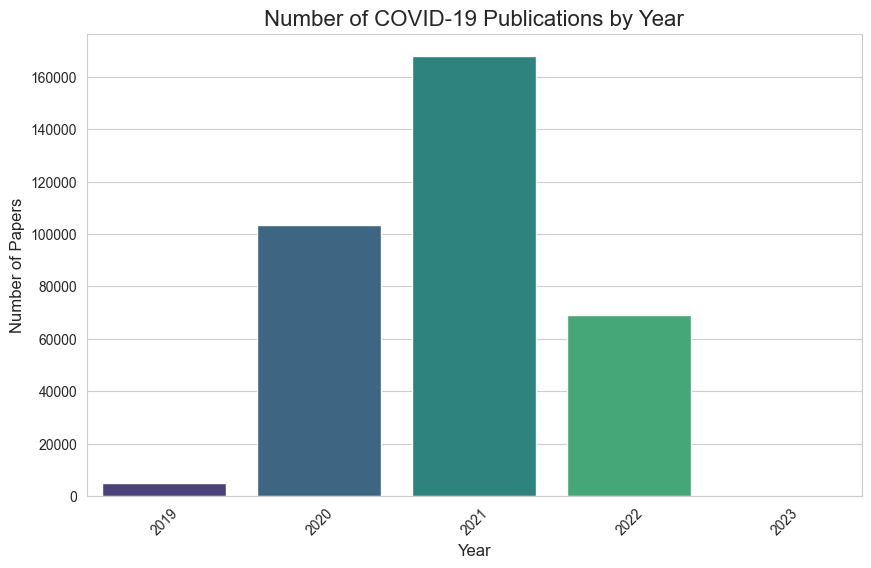

In [61]:
# Create the plot
plt.figure(figsize=(10, 6)) # Set the figure size
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Add titles and labels
plt.title('Number of COVID-19 Publications by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.xticks(rotation=45) # Rotate x-axis labels if needed

# Show the plot
plt.show()

# Visualization 2: Bar Chart of Top Publishing Journals. #

C:\Users\nican\AppData\Local\Temp\ipykernel_14012\2604117201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.values, y=top_journals.index, palette='mako')


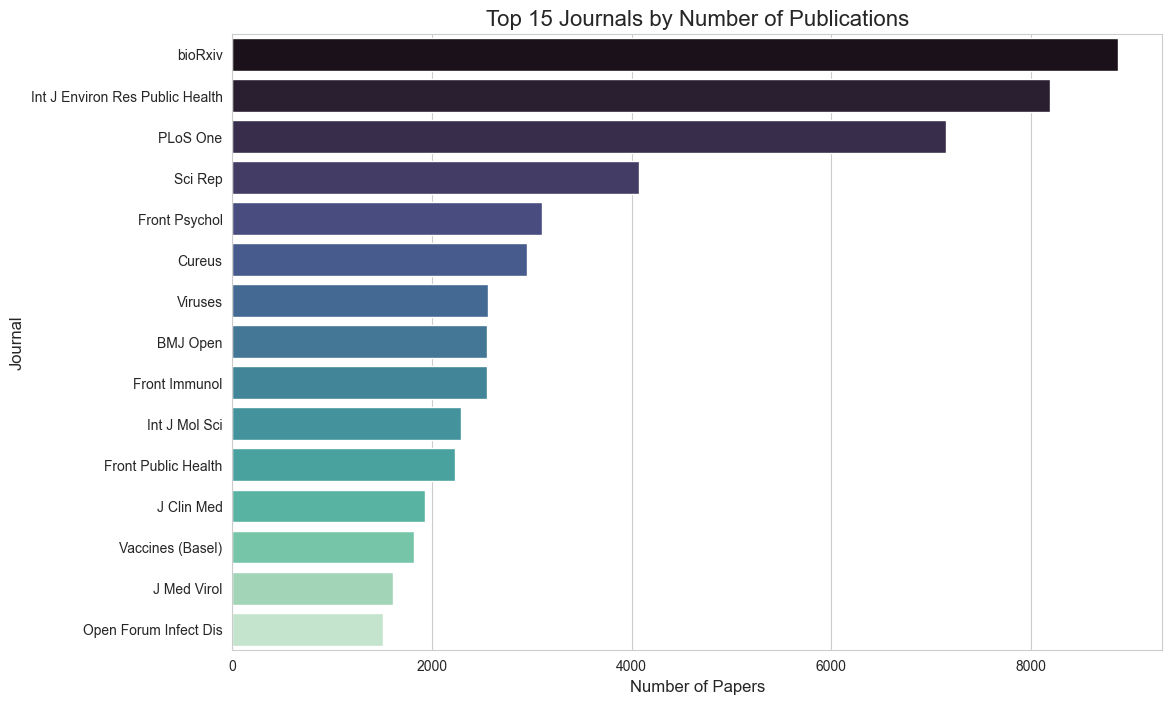

In [64]:
# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_journals.values, y=top_journals.index, palette='mako')

# Add titles and labels
plt.title('Top 15 Journals by Number of Publications', fontsize=16)
plt.xlabel('Number of Papers', fontsize=12)
plt.ylabel('Journal', fontsize=12)

# Show the plot
plt.show()

# Visualization 3: Generate a Word Cloud of Paper Titles. #

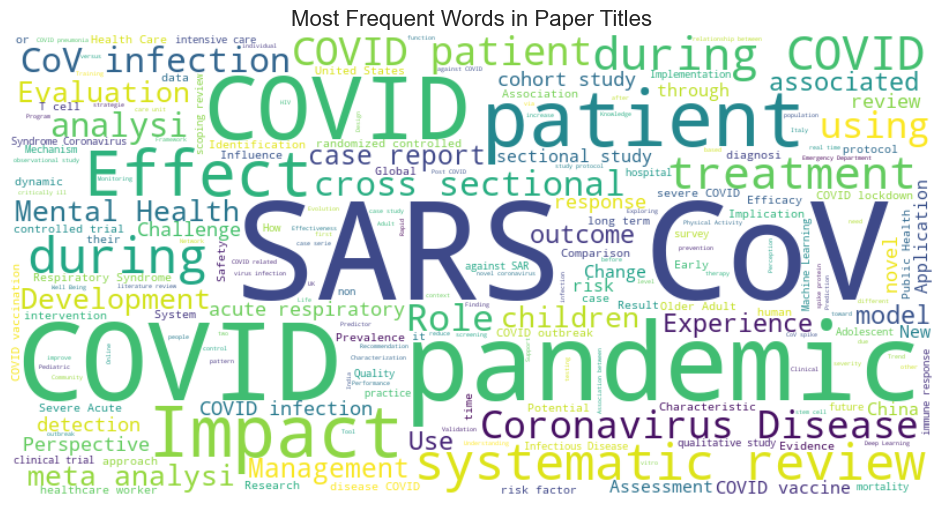

In [67]:
# Display the generated image using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # Hide the axes
plt.title('Most Frequent Words in Paper Titles', fontsize=16)
plt.show()

# Visualization 4: Plot Distribution of Paper Counts by Source. #

C:\Users\nican\AppData\Local\Temp\ipykernel_14012\4268564655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette='rocket')


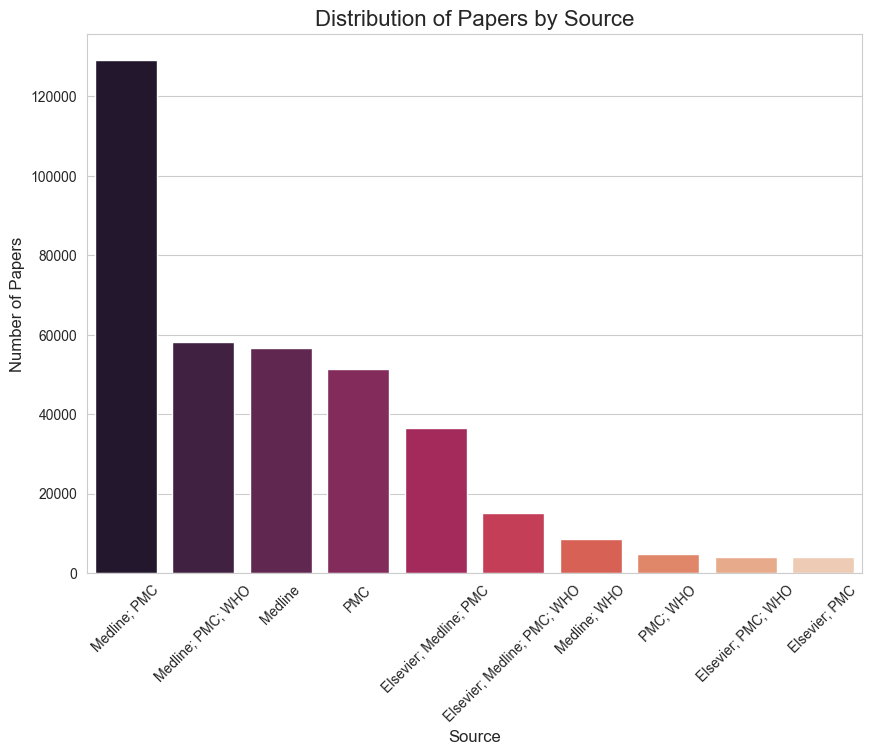

In [70]:
# Create the plot
plt.figure(figsize=(10, 7))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='rocket')

# Add titles and labels
plt.title('Distribution of Papers by Source', fontsize=16)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()